In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
insurance = pd.read_excel('INSURANCE.xlsx', sheet_name='TRAINING')
insurance.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
insurance.drop('Loan_ID', axis=1, inplace=True)

#### Missing Values

In [29]:
null_count = insurance.isnull().sum()

In [30]:
percentage = insurance.isnull().sum()*100/614

In [31]:
pd.concat([null_count, percentage], axis=1, keys=['null_count','percentage']).sort_values(by='percentage',ascending=False)

,null_count,percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


In [32]:
# fill missing `Gender` values with the mode
insurance.Gender.fillna(insurance.Gender.mode()[0],inplace=True)
# fill missing `Married` values with the mode
insurance.Married.fillna(insurance.Married.mode()[0],inplace=True)
# fill missing `Dependents` values with the mode
insurance.Dependents.fillna(insurance.Dependents.mode()[0],inplace=True)
# fill missing `Self_Employed` values with the mode
insurance.Self_Employed.fillna(insurance.Self_Employed.mode()[0],inplace=True)
# fill missing `LoanAmount` values with the median
insurance.LoanAmount.fillna(insurance.LoanAmount.median(),inplace=True)
# fill missing `Loan_Amount_Term` values with the mode
insurance.Loan_Amount_Term.fillna(insurance.Loan_Amount_Term.mode()[0],inplace=True)
# fill missing `Credit_History` values with the mode
insurance.Credit_History.fillna(insurance.Credit_History.mode()[0],inplace=True)

In [33]:
insurance.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [35]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
code_numeric = {
    'Male':1,
    'Female':0,
    'Graduate':1,
    'Not Graduate':0,
    'Yes':1,
    'No':0,
    'Y':1,
    'N':0
}

In [37]:
insurance = insurance.applymap(lambda x: code_numeric.get(x) if x in code_numeric else x)

In [38]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [39]:
insurance = insurance.astype(dtype={'Dependents':'int64','Loan_Amount_Term':'int64','Credit_History':'int64'})

<AxesSubplot:>

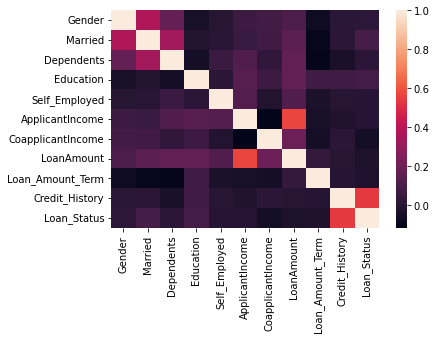

In [40]:
sns.heatmap(insurance.corr())

In [41]:
def dummify(data, columns):
    for col in columns:
        x = pd.get_dummies(data[col],prefix=col,drop_first=True)
        data = data.drop(col, 1)
        data = pd.concat([data, x], axis=1)
    return data

In [42]:
insurance = dummify(insurance,['Property_Area','Loan_Status'])

C:\Users\JAKEED~1.BER\AppData\Local\Temp/ipykernel_22892/921537213.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(col, 1)


#### X and Y

In [43]:
insurance.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_1
0,1,0,0,1,0,5849,0.0,128.0,360,1,0,1,1


In [44]:
X = insurance.iloc[:, :-1].values
y = insurance.iloc[:, -1].values

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [51]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.0,1.0,0.0,-0.400019,0.493485,-0.179308,0.269838,1.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.846479,-0.547973,0.570804,0.269838,1.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.0,-0.251196,0.074388,0.028416,0.269838,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,-0.271490,-0.547973,-0.352410,-2.577377,1.0,0.0,1.0
4,1.0,1.0,2.0,1.0,0.0,-0.136949,-0.049869,0.039956,0.269838,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
486,1.0,1.0,0.0,1.0,0.0,-0.378221,-0.081113,-0.767857,0.269838,1.0,0.0,1.0
487,1.0,1.0,1.0,1.0,0.0,1.085647,3.390891,2.336453,0.269838,1.0,1.0,0.0
488,1.0,1.0,3.0,1.0,0.0,-0.067950,0.589370,0.616965,0.269838,1.0,1.0,0.0
489,1.0,1.0,0.0,0.0,0.0,0.062232,-0.547973,0.155358,0.269838,1.0,0.0,1.0


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 5:9] = sc.fit_transform(X_train[:, 5:9])
X_test[:, 5:9] = sc.fit_transform(X_test[:, 5:9])

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(max_iter=200)
classifier_LR.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [49]:
y_pred_LR = classifier_LR.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_LR)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_LR))
print('F1 Score:', f1_score(y_test, y_pred_LR))
print('Precision:', precision_score(y_test, y_pred_LR))
print('Recall:', recall_score(y_test, y_pred_LR))

[[15 18]
 [ 2 88]]
Accuracy: 0.8373983739837398
F1 Score: 0.8979591836734695
Precision: 0.8301886792452831
Recall: 0.9777777777777777


## K-Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred_KNN = classifier_KNN.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_KNN))
print('F1 Score:', f1_score(y_test, y_pred_KNN))
print('Precision:', precision_score(y_test, y_pred_KNN))
print('Recall:', recall_score(y_test, y_pred_KNN))

[[18 15]
 [14 76]]
Accuracy: 0.7642276422764228
F1 Score: 0.839779005524862
Precision: 0.8351648351648352
Recall: 0.8444444444444444


## Support Vector Machine

In [58]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

y_pred_SVM = classifier_SVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_SVM))
print('F1 Score:', f1_score(y_test, y_pred_SVM))
print('Precision:', precision_score(y_test, y_pred_SVM))
print('Recall:', recall_score(y_test, y_pred_SVM))

[[14 19]
 [ 2 88]]
Accuracy: 0.8292682926829268
F1 Score: 0.8934010152284264
Precision: 0.822429906542056
Recall: 0.9777777777777777


## Support Vector Machine - Kernel

In [59]:
from sklearn.svm import SVC
classifier_Kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_Kernel.fit(X_train, y_train)

y_pred_Kernel = classifier_Kernel.predict(X_test)

cm = confusion_matrix(y_test, y_pred_Kernel)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_Kernel))
print('F1 Score:', f1_score(y_test, y_pred_Kernel))
print('Precision:', precision_score(y_test, y_pred_Kernel))
print('Recall:', recall_score(y_test, y_pred_Kernel))

[[14 19]
 [ 3 87]]
Accuracy: 0.8211382113821138
F1 Score: 0.8877551020408163
Precision: 0.8207547169811321
Recall: 0.9666666666666667


## Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

y_pred_NB = classifier_NB.predict(X_test)

cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_NB))
print('F1 Score:', f1_score(y_test, y_pred_NB))
print('Precision:', precision_score(y_test, y_pred_NB))
print('Recall:', recall_score(y_test, y_pred_NB))

[[15 18]
 [ 2 88]]
Accuracy: 0.8373983739837398
F1 Score: 0.8979591836734695
Precision: 0.8301886792452831
Recall: 0.9777777777777777


## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier_D3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_D3.fit(X_train, y_train)

y_pred_D3 = classifier_D3.predict(X_test)

cm = confusion_matrix(y_test, y_pred_D3)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_D3))
print('F1 Score:', f1_score(y_test, y_pred_D3))
print('Precision:', precision_score(y_test, y_pred_D3))
print('Recall:', recall_score(y_test, y_pred_D3))

[[19 14]
 [37 53]]
Accuracy: 0.5853658536585366
F1 Score: 0.6751592356687899
Precision: 0.7910447761194029
Recall: 0.5888888888888889


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

y_pred_RF = classifier_RF.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print('F1 Score:', f1_score(y_test, y_pred_RF))
print('Precision:', precision_score(y_test, y_pred_RF))
print('Recall:', recall_score(y_test, y_pred_RF))

[[16 17]
 [11 79]]
Accuracy: 0.7723577235772358
F1 Score: 0.8494623655913979
Precision: 0.8229166666666666
Recall: 0.8777777777777778
